### **Importing the dependencies**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Importing the dataset**

In [82]:
dataset=pd.read_csv("train.csv")
dataset.shape

(614, 13)

### **Visualizing various parameters of dataset**

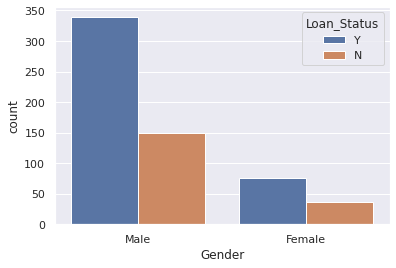

In [83]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(x="Gender", hue="Loan_Status", data=dataset)

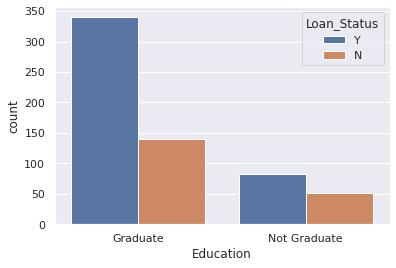

In [84]:
sns.countplot(x="Education", hue="Loan_Status", data=dataset)

In [85]:
dataset.head(n=3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### **Data Preprocessing**



> Dealing with 'Not Available' data



In [86]:
dataset.isna().sum() # here isna() means "is not available"

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
# drop those not available rows
dataset.dropna(axis=0,inplace=True) # axis=0 means drop those 'rows' axis=1 means drop those 'columns'
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [88]:
dataset.shape

(480, 13)

>Processing categorical data





In [89]:
dataset=dataset.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Dependents':{'3+':4},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Urban':2, 'Rural':0, 'Semiurban': 1}, 'Loan_Status':{'Y':1, 'N':0}})

In [90]:
#dropping 'Loan_ID' column
dataset=dataset.drop(columns=['Loan_ID',])

In [91]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [92]:
print(X)

[[0 1 '1' ... 360.0 1.0 0]
 [0 1 '0' ... 360.0 1.0 2]
 [0 1 '0' ... 360.0 1.0 2]
 ...
 [0 1 '1' ... 360.0 1.0 2]
 [0 1 '2' ... 360.0 1.0 2]
 [1 0 '0' ... 360.0 0.0 1]]


### **Splitting dataset into train and test set**

In [93]:
#Splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=2)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(432, 11)
(48, 11)
(480, 11)


### **Feature Scaling**

In [95]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
print(X_train)

[[ 2.19950854 -1.33682339  0.09710962 ...  0.28077141  0.41319694
  -0.02101287]
 [-0.45464702  0.74804197 -0.70964719 ...  0.28077141  0.41319694
  -0.02101287]
 [-0.45464702  0.74804197 -0.70964719 ...  0.28077141  0.41319694
  -0.02101287]
 ...
 [-0.45464702  0.74804197  0.90386642 ... -2.47172287  0.41319694
  -0.02101287]
 [-0.45464702  0.74804197 -0.70964719 ...  0.28077141  0.41319694
  -1.3178074 ]
 [-0.45464702  0.74804197 -0.70964719 ...  0.28077141  0.41319694
   1.27578166]]


### **Initializing and training the model**

In [96]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Predicting with the model**

In [97]:
y_pred=model.predict(sc.transform(X_test))

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 7  8]
 [ 0 33]]
0.8333333333333334
